In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [3]:
# Load data
df = pd.read_csv("support_cases.csv")


In [4]:

# Shape and null values
print("Shape:", df.shape)
print("Null values:\n", df.isnull().sum())


Shape: (100, 3)
Null values:
 message_length    0
response_time     0
case_type         0
dtype: int64


In [5]:
# Outlier detection
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"Outliers in {col}: {len(outliers)}")


Outliers in message_length: 0
Outliers in response_time: 0


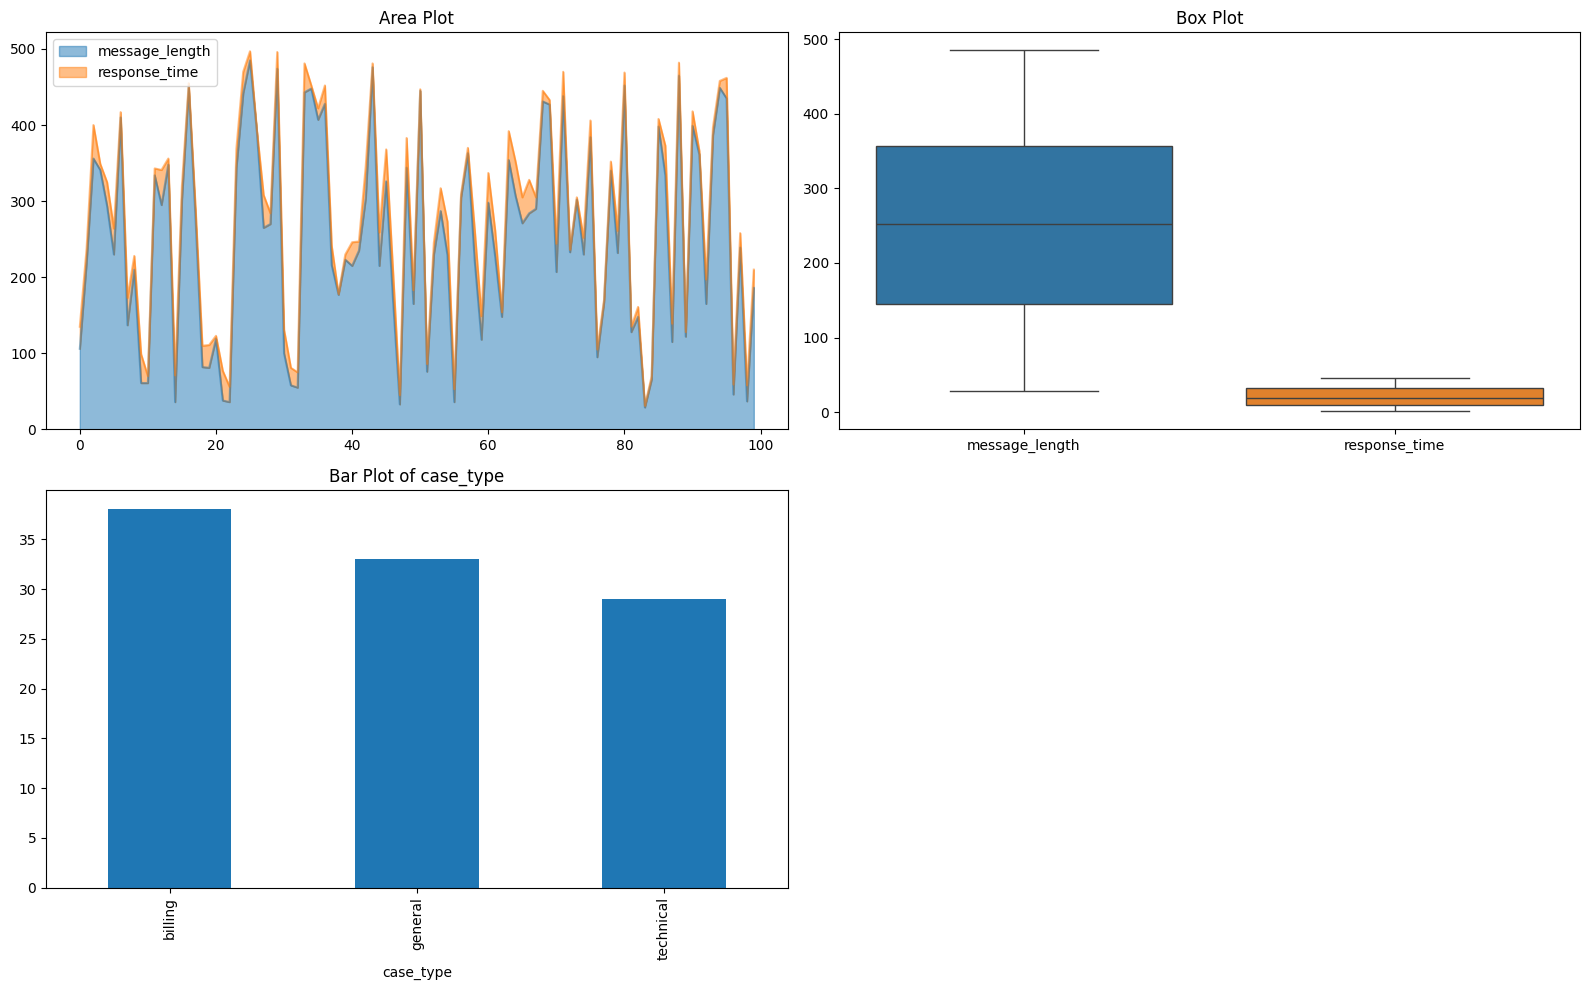

In [6]:
# Plots
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
df[numerical_cols].plot.area(ax=plt.gca(), alpha=0.5)
plt.title("Area Plot")

plt.subplot(2, 2, 2)
sns.boxplot(data=df[numerical_cols])
plt.title("Box Plot")

plt.subplot(2, 2, 3)
for col in df.select_dtypes(include='object').columns:
    df[col].value_counts().plot(kind='bar', ax=plt.gca())
    plt.title(f"Bar Plot of {col}")
    plt.tight_layout()
    plt.show()


In [10]:
# Encode categorical
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Model and accuracy (assume last column is target)
X = df_encoded.iloc[:, :-1]
y = df_encoded.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.55
